In [44]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import datetime
import xlrd

path='./'
fire_df=pd.read_excel(path + '서울시 화재 출동현황(2018.1_2019.11).xlsx')
city_code=pd.read_csv(path + '서울시 법정동코드.txt', encoding='euc-kr', delimiter='\t')
city_code=city_code[city_code.폐지여부 != "폐지"]
city_code.법정동명=city_code.법정동명.str.split(" ")
city_code.법정동명=city_code.법정동명.transform(lambda x : x[:2][-1])
df_uniq_city=city_code.법정동명
df_uniq_city=df_uniq_city.drop_duplicates().reset_index()

In [76]:
fire_df

,소방서,119안전센터,접수일시,출동일시,도착일시,시도,시군구,읍면동,소방서거리(㎞)
0,강북소방서,번동119안전센터,2018-01-01 00:49:38,2018-01-01 00:50:34,2018-01-01 00:55:00,서울특별시,강북구,번동,1.4
1,관악소방서,봉천119안전센터,2018-01-01 02:34:10,2018-01-01 02:36:17,2018-01-01 02:39:00,서울특별시,관악구,봉천동,0.8
2,강북소방서,번동119안전센터,2018-01-01 05:04:43,2018-01-01 05:05:53,2018-01-01 05:10:00,서울특별시,강북구,수유동,1.7
3,구로소방서,시흥119안전센터,2018-01-01 08:09:23,2018-01-01 08:10:00,2018-01-01 08:16:00,서울특별시,금천구,시흥동,1.5
4,구로소방서,독산119안전센터,2018-01-01 08:20:13,2018-01-01 08:20:40,2018-01-01 08:25:00,서울특별시,금천구,시흥동,1.9
5,영등포소방서,대림119안전센터,2018-01-01 09:35:40,2018-01-01 09:36:43,2018-01-01 09:40:19,서울특별시,영등포구,신길동,1.2
6,성동소방서,왕십리119안전센터,2018-01-01 10:11:38,2018-01-01 10:13:07,2018-01-01 10:16:23,서울특별시,성동구,도선동,0.6
7,중부소방서,무학119안전센터,2018-01-01 10:44:41,2018-01-01 10:45:22,2018-01-01 10:47:00,서울특별시,중구,신당동,0.8
8,성동소방서,금호119안전센터,2018-01-01 10:53:23,2018-01-01 10:53:47,2018-01-01 11:00:00,서울특별시,성동구,금호동3가,0.7
9,중부소방서,무학119안전센터,2018-01-01 12:45:08,2018-01-01 12:45:53,2018-01-01 12:49:00,서울특별시,중구,신당동,1.2


In [161]:
import math

label=[]
datas=[]

for idx, row in fire_df.iterrows():
    diff=math.ceil((row['도착일시']-row['출동일시']).seconds/60)
    label.append(diff)
    
    data=[]
    data.append(int(row['소방서거리(㎞)']))
    data.append(df_uniq_city[df_uniq_city.법정동명==row["시군구"]].index.item())
    datas.append(data)

In [67]:
#svc.SVC Model
train_data, test_data, train_label, test_label = train_test_split(datas, label)

clf=svm.SVC()
clf.fit(train_data, train_label)

pre=clf.predict(test_data)
score=metrics.accuracy_score(test_label, pre)

print('Score:', score)

Score: 0.3556019485038274


In [68]:
#RandomForestClassifer
train_data, test_data, train_label, test_label = train_test_split(datas, label)

clf=RandomForestClassifier()
clf.fit(train_data, train_label)

pre=clf.predict(test_data)
score=metrics.accuracy_score(test_label, pre)

print('Score:', score)

Score: 0.36221294363256784


In [69]:
datas

[[1, 9],
 [0, 21],
 [1, 9],
 [1, 18],
 [1, 18],
 [1, 19],
 [0, 4],
 [0, 2],
 [0, 4],
 [1, 2],
 [1, 25],
 [2, 20],
 [1, 23],
 [0, 7],
 [1, 5],
 [1, 10],
 [1, 24],
 [0, 6],
 [1, 7],
 [0, 17],
 [1, 12],
 [1, 6],
 [1, 19],
 [2, 21],
 [2, 15],
 [1, 16],
 [2, 22],
 [0, 14],
 [1, 24],
 [1, 17],
 [2, 23],
 [1, 24],
 [1, 21],
 [0, 7],
 [0, 1],
 [3, 18],
 [0, 14],
 [0, 8],
 [2, 24],
 [2, 21],
 [2, 23],
 [1, 23],
 [0, 14],
 [2, 23],
 [2, 21],
 [1, 16],
 [1, 16],
 [1, 24],
 [0, 23],
 [2, 11],
 [7, 24],
 [1, 1],
 [2, 19],
 [0, 1],
 [0, 7],
 [0, 7],
 [2, 24],
 [3, 22],
 [1, 3],
 [1, 8],
 [2, 24],
 [0, 5],
 [1, 25],
 [0, 16],
 [1, 12],
 [1, 1],
 [1, 6],
 [0, 25],
 [1, 10],
 [2, 23],
 [0, 1],
 [2, 16],
 [2, 23],
 [0, 9],
 [0, 18],
 [2, 23],
 [2, 9],
 [1, 20],
 [1, 13],
 [1, 18],
 [1, 8],
 [0, 23],
 [2, 18],
 [1, 16],
 [1, 1],
 [0, 7],
 [2, 11],
 [1, 19],
 [1, 12],
 [4, 15],
 [1, 8],
 [0, 11],
 [0, 2],
 [1, 14],
 [2, 20],
 [0, 19],
 [0, 16],
 [2, 17],
 [1, 7],
 [2, 16],
 [1, 3],
 [1, 24],
 [0, 4],
 [2,

In [70]:
#구역별로 바꾼 데이터가 효율이 많이 높지 않아서 시간을 다시 추가했습니다.
for idx, row in fire_df.iterrows():
    datas[idx].append(row['출동일시'].hour)

In [71]:
#svc.SVC Model
train_data, test_data, train_label, test_label = train_test_split(datas, label)

clf=svm.SVC()
clf.fit(train_data, train_label)

pre=clf.predict(test_data)
score=metrics.accuracy_score(test_label, pre)

print('Score:', score)

Score: 0.33159359777313846


In [72]:
#RandomForestClassifer
train_data, test_data, train_label, test_label = train_test_split(datas, label)

clf=RandomForestClassifier()
clf.fit(train_data, train_label)

pre=clf.predict(test_data)
score=metrics.accuracy_score(test_label, pre)

print('Score:', score)

Score: 0.3173277661795407


In [65]:
label

[4.433333333333334,
 2.716666666666667,
 4.116666666666666,
 6.0,
 4.333333333333333,
 3.6,
 3.2666666666666666,
 1.6333333333333333,
 6.216666666666667,
 3.1166666666666667,
 2.8833333333333333,
 5.316666666666666,
 4.716666666666667,
 3.75,
 3.683333333333333,
 3.783333333333333,
 3.8333333333333335,
 1.6666666666666667,
 2.8833333333333333,
 1.5333333333333334,
 1.35,
 3.25,
 3.45,
 3.5833333333333335,
 5.083333333333333,
 4.783333333333333,
 4.066666666666666,
 3.966666666666667,
 5.283333333333333,
 3.0,
 5.433333333333334,
 4.45,
 2.316666666666667,
 6.333333333333333,
 3.4166666666666665,
 7.833333333333333,
 3.75,
 2.1666666666666665,
 2.6333333333333333,
 4.7,
 4.633333333333334,
 3.8666666666666667,
 2.3833333333333333,
 3.1166666666666667,
 4.15,
 2.8833333333333333,
 3.6166666666666667,
 2.75,
 2.6,
 3.4,
 10.983333333333333,
 2.7666666666666666,
 2.05,
 2.1666666666666665,
 2.1666666666666665,
 3.3,
 2.933333333333333,
 5.45,
 3.35,
 2.3666666666666667,
 5.35,
 4.95,
 1.81

In [153]:
fire_df_new=fire_df[['접수일시', '시군구', '소방서거리(㎞)']]
fire_df_new['접수일'] = [d.date() for d in fire_df_new['접수일시']]
fire_df_new['접수시간'] = [d.time() for d in fire_df_new['접수일시']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [86]:
fire_df_new=fire_df_new[1:]

In [104]:
del(fire_df_new['접수일시'])

In [154]:
fire_df_new['접수월']=[d.month for d in fire_df_new['접수일']]
fire_df_new['접수시']=[d.hour for d in fire_df_new['접수시간']]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [155]:
len(fire_df_new)

11495

In [100]:
len(label)

11495

In [101]:
len(datas)

11495

In [102]:
len(fire_df)

11495

In [162]:
fire_df_new['걸린시간']=label

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [151]:
fire_df_new

,시군구,소방서거리(㎞),접수일,접수시간,걸린시간,접수월,접수시
0,강북구,1.4,2018-01-01,00:49:38,5,1,0
1,관악구,0.8,2018-01-01,02:34:10,3,1,2
2,강북구,1.7,2018-01-01,05:04:43,5,1,5
3,금천구,1.5,2018-01-01,08:09:23,6,1,8
4,금천구,1.9,2018-01-01,08:20:13,5,1,8
5,영등포구,1.2,2018-01-01,09:35:40,4,1,9
6,성동구,0.6,2018-01-01,10:11:38,4,1,10
7,중구,0.8,2018-01-01,10:44:41,2,1,10
8,성동구,0.7,2018-01-01,10:53:23,7,1,10
9,중구,1.2,2018-01-01,12:45:08,4,1,12


In [110]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [141]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10,10)

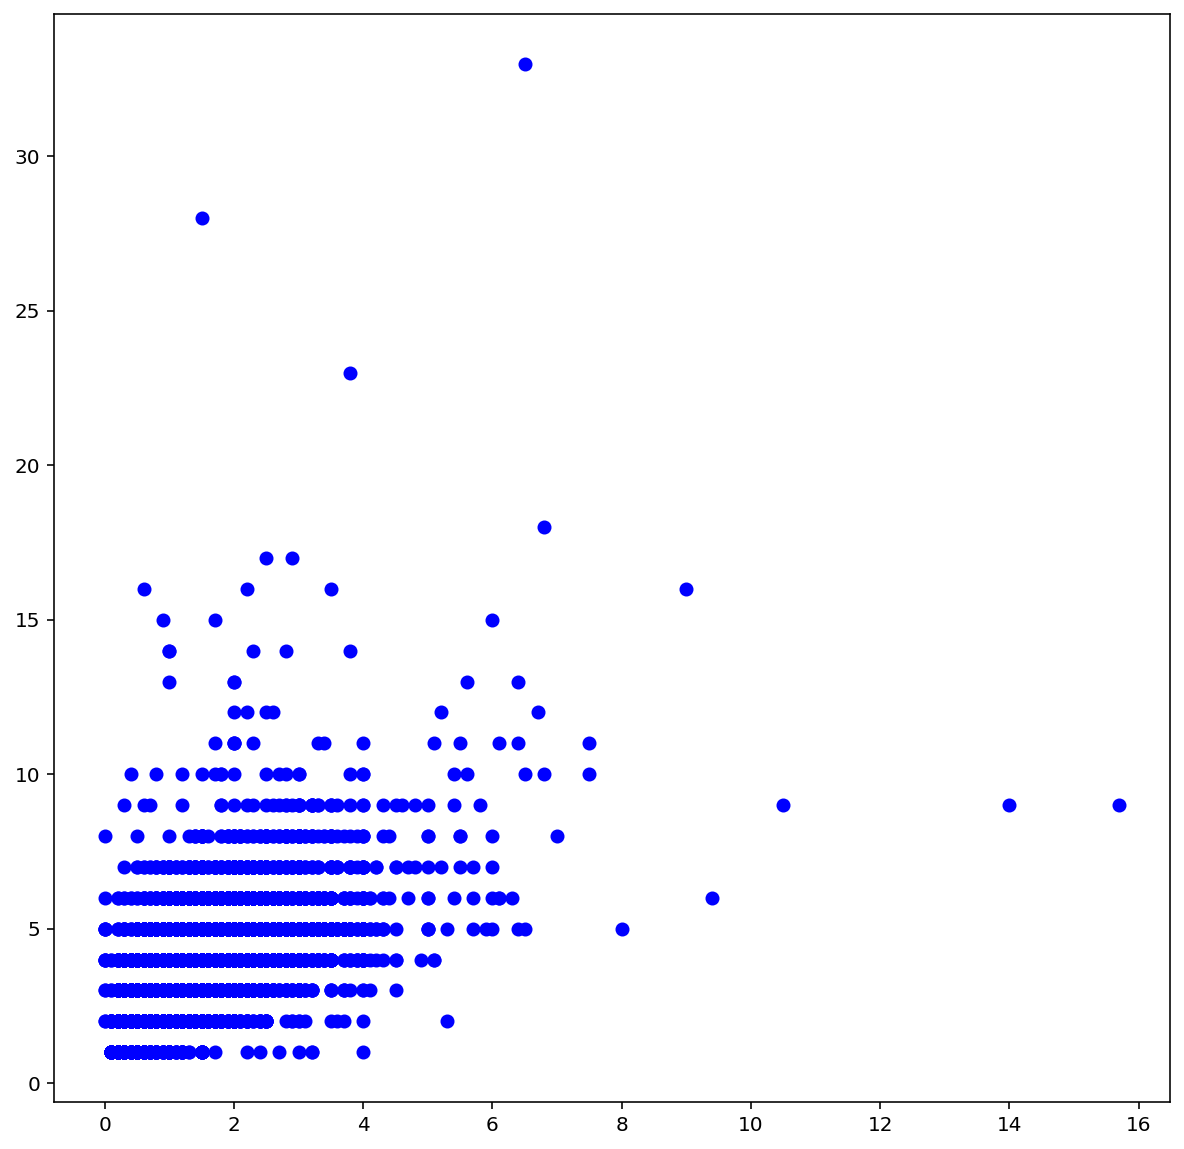

In [163]:
plt.plot(fire_df_new["소방서거리(㎞)"], fire_df_new['걸린시간'], 'ob')

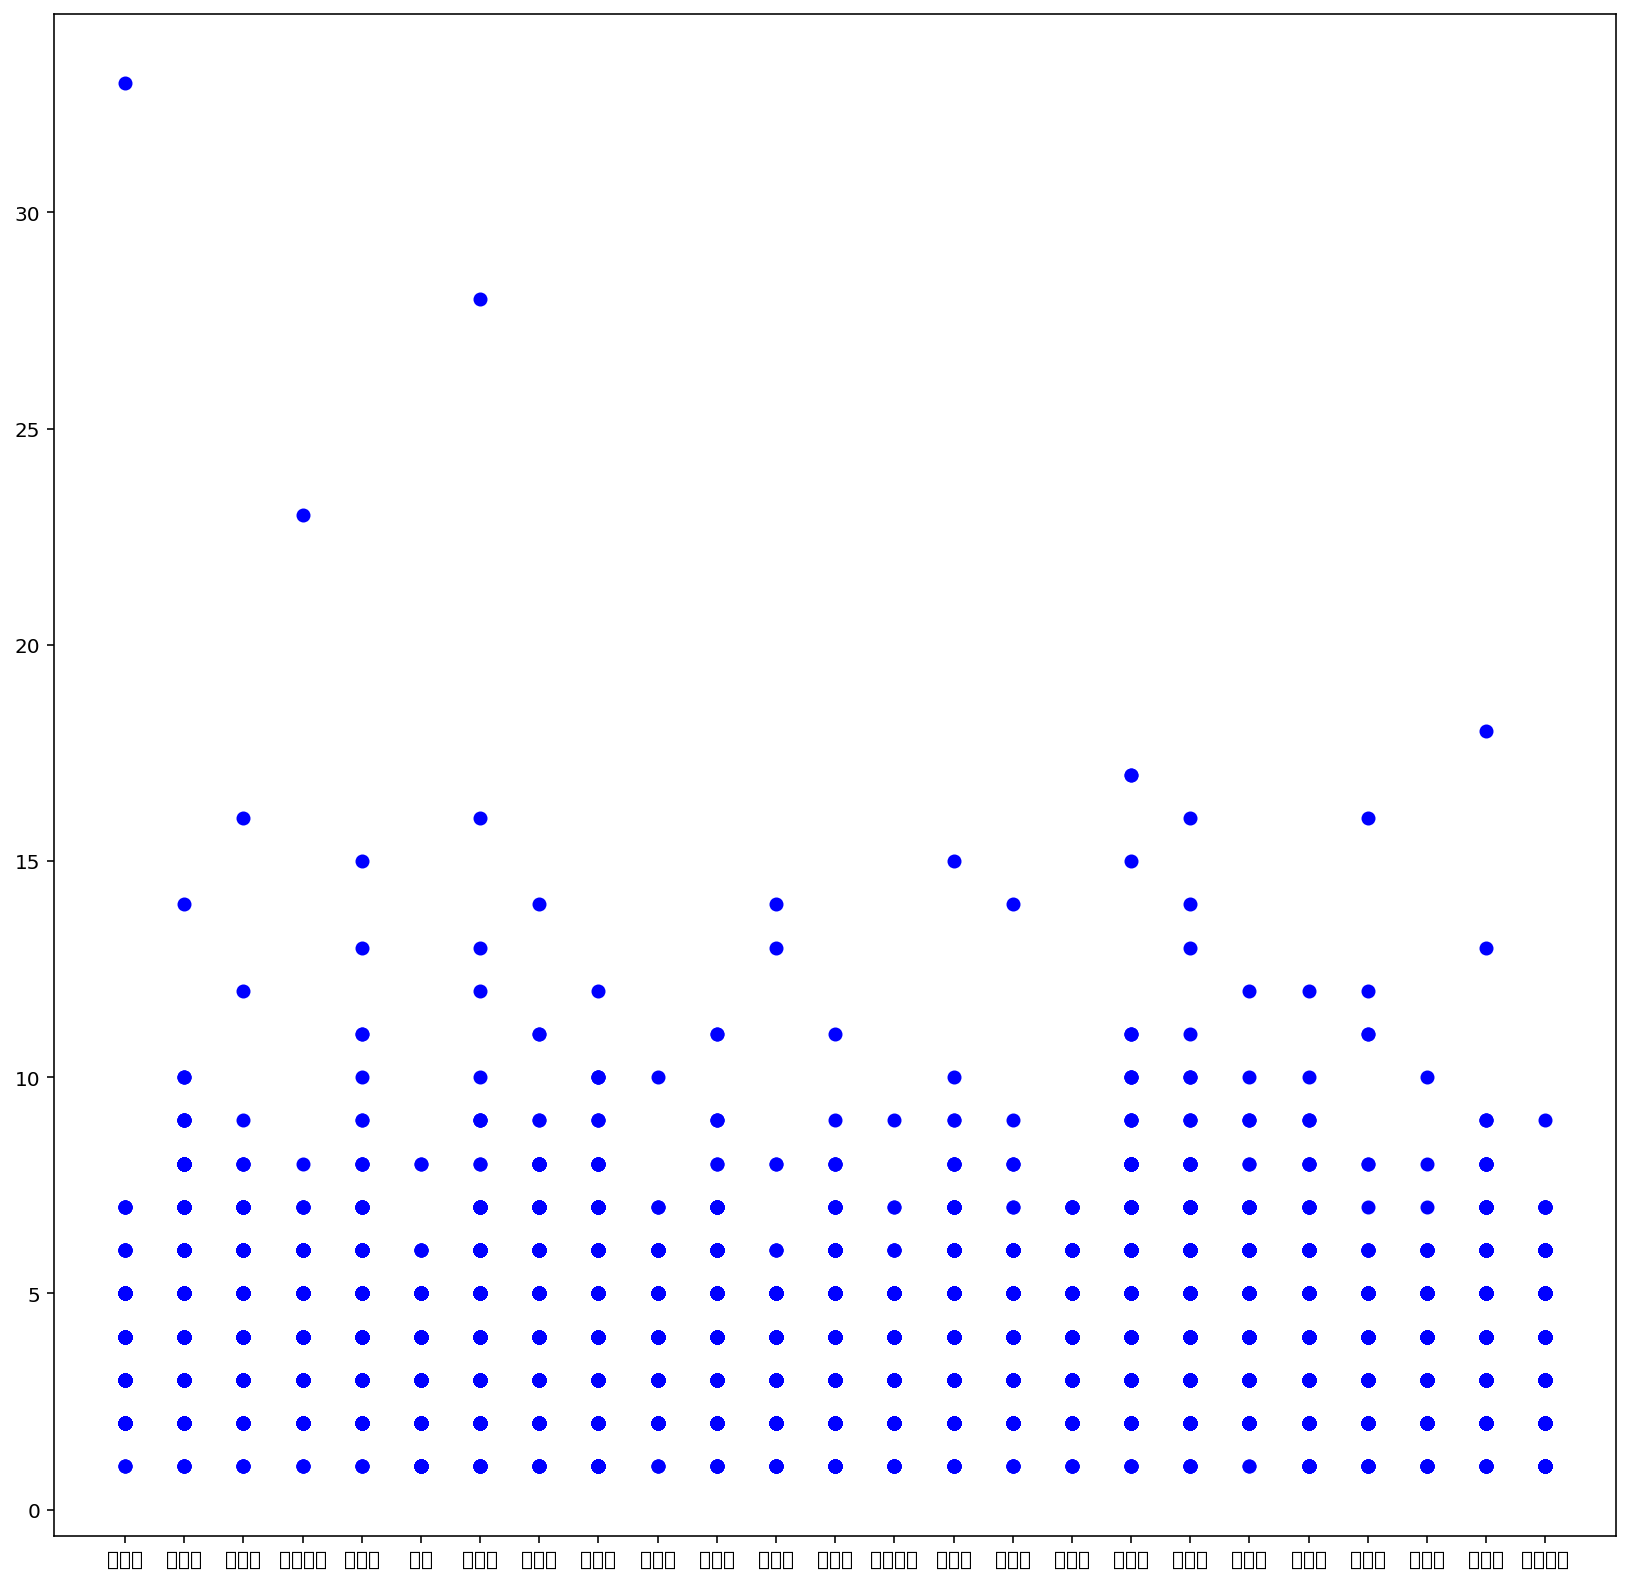

In [131]:
plt.plot(fire_df_new["시군구"], fire_df_new['걸린시간'], "ob")

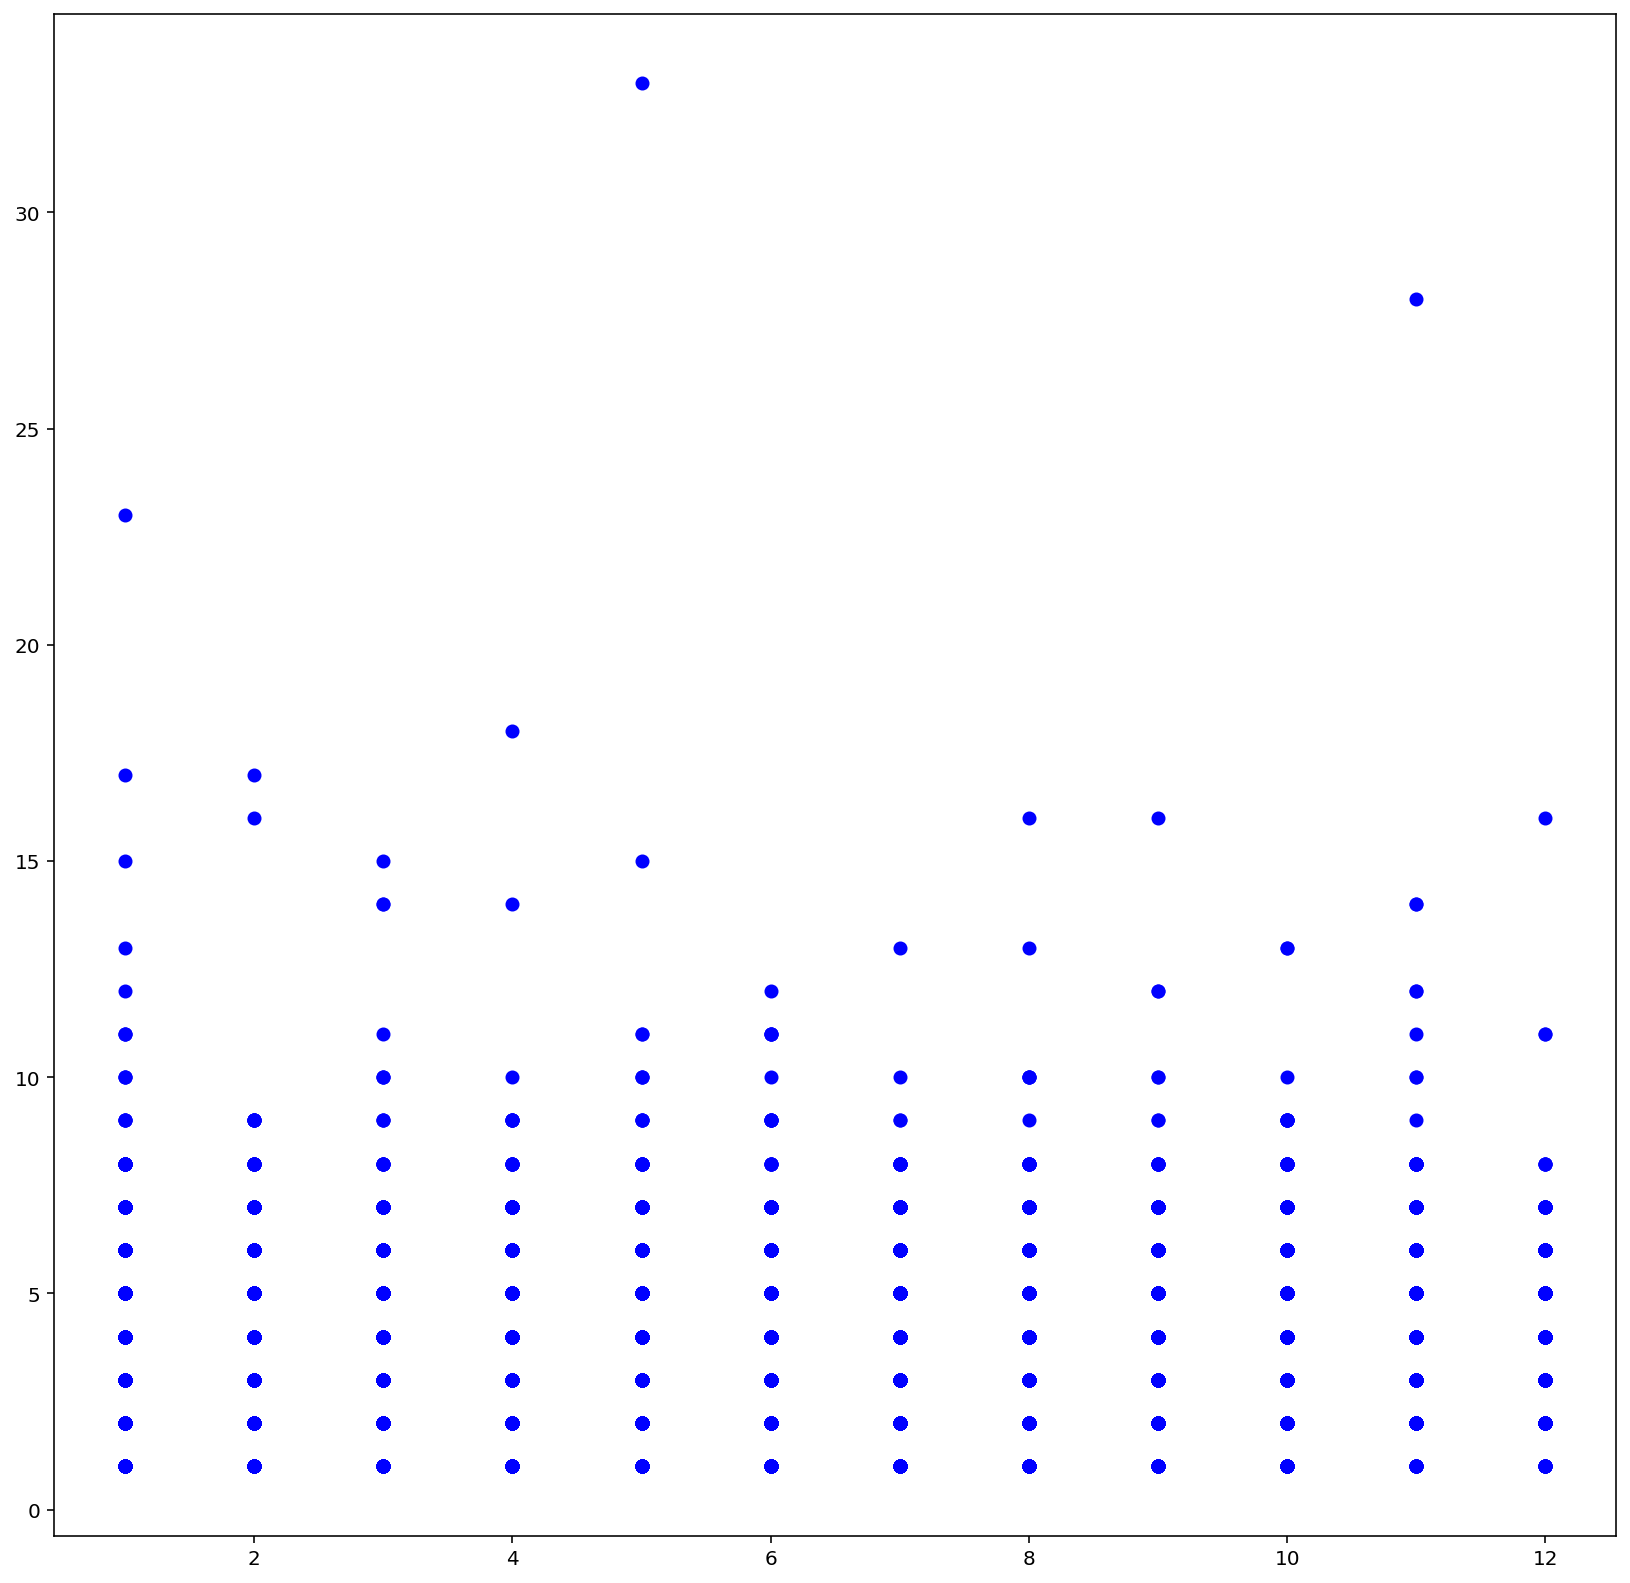

In [132]:
plt.plot(fire_df_new["접수월"], fire_df_new['걸린시간'], "ob")

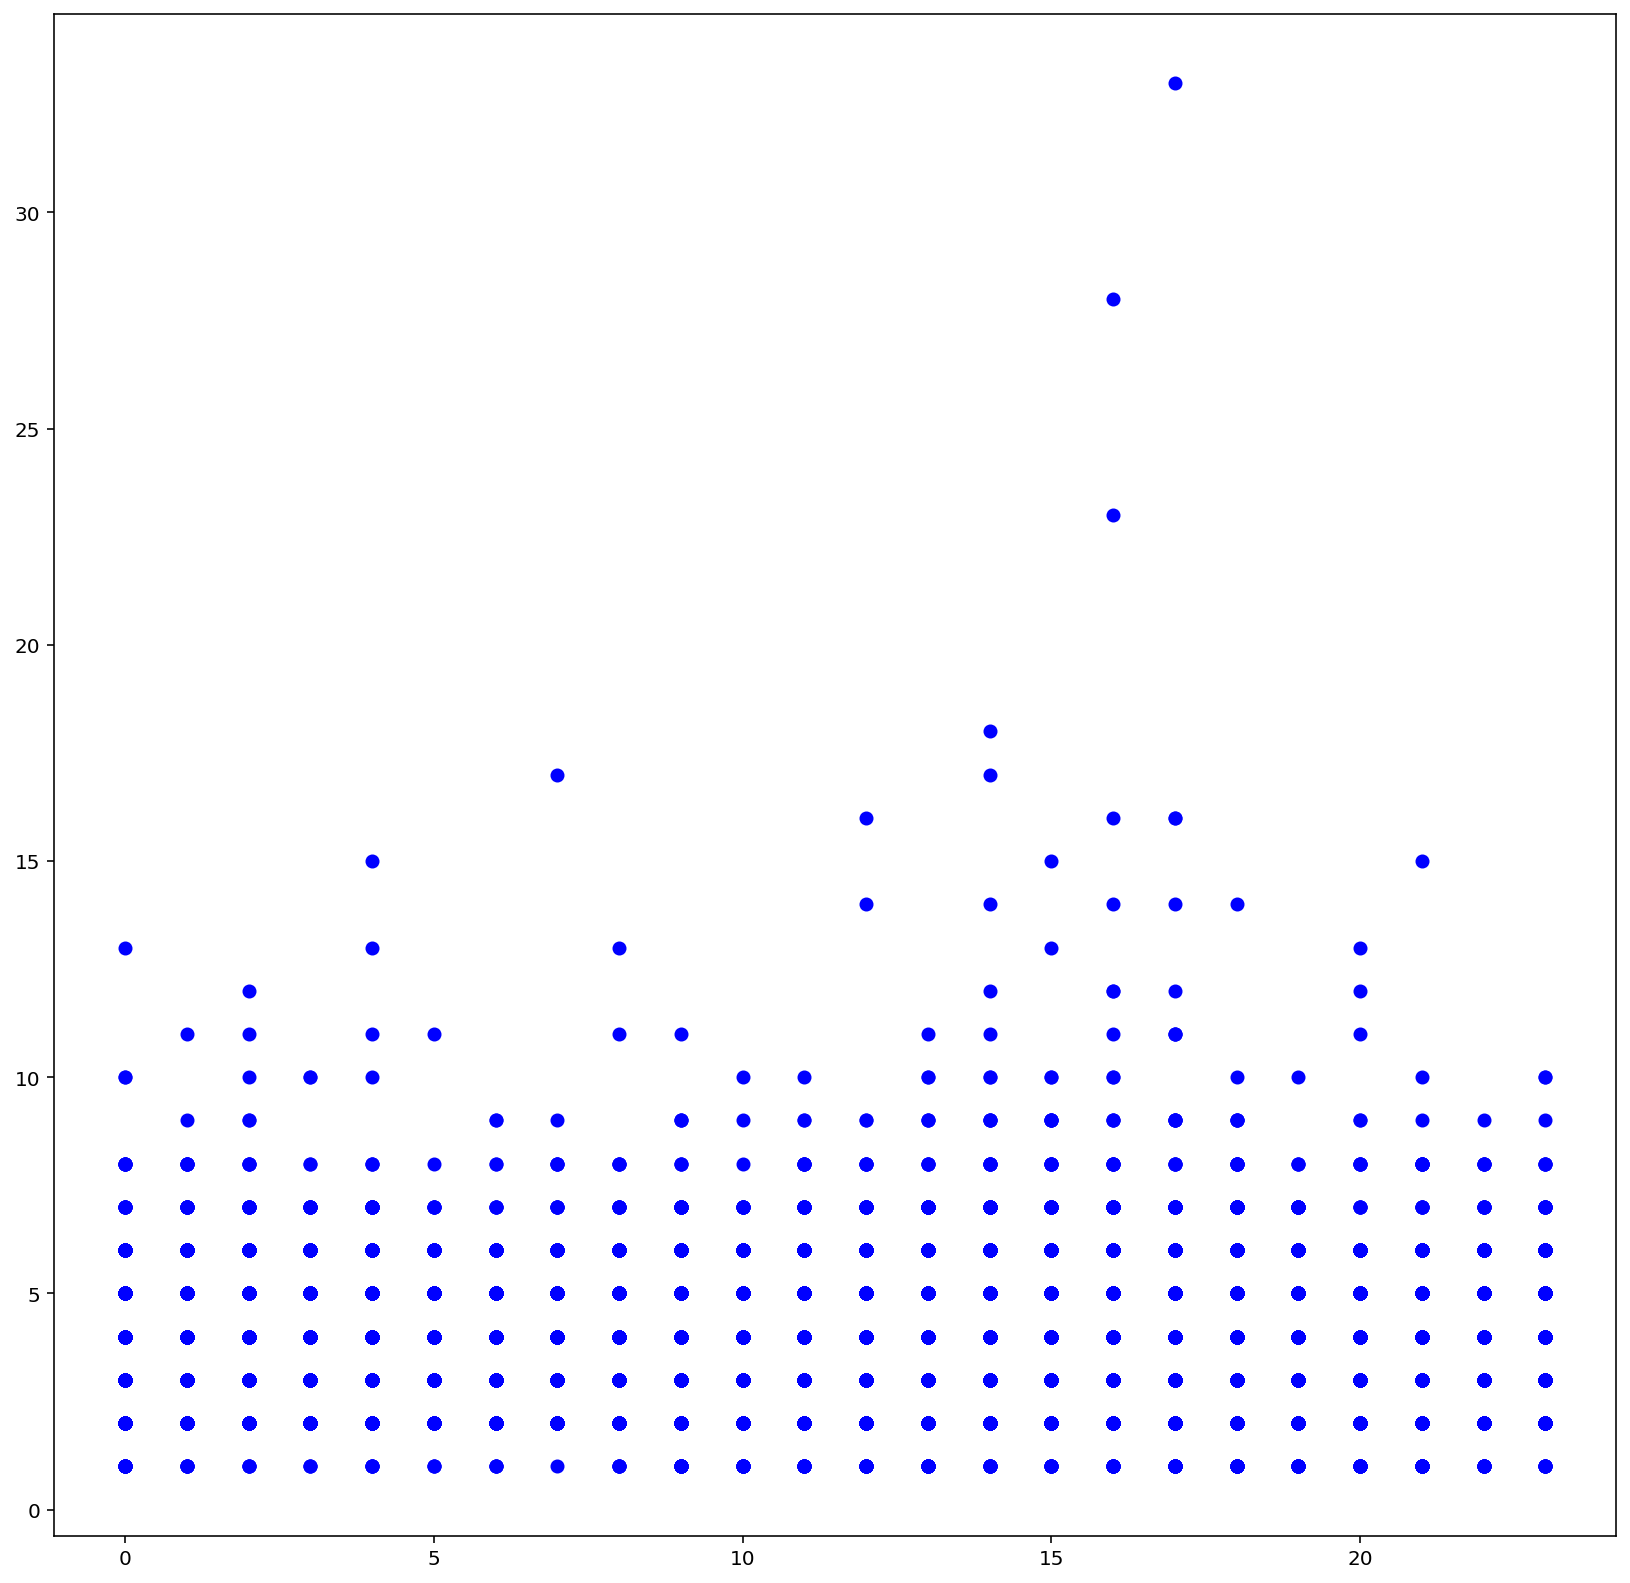

In [133]:
plt.plot(fire_df_new["접수시"], fire_df_new['걸린시간'], "ob")

In [140]:
fire_df_new=fire_df_new[fire_df_new["소방서거리(㎞)"]<7.0]

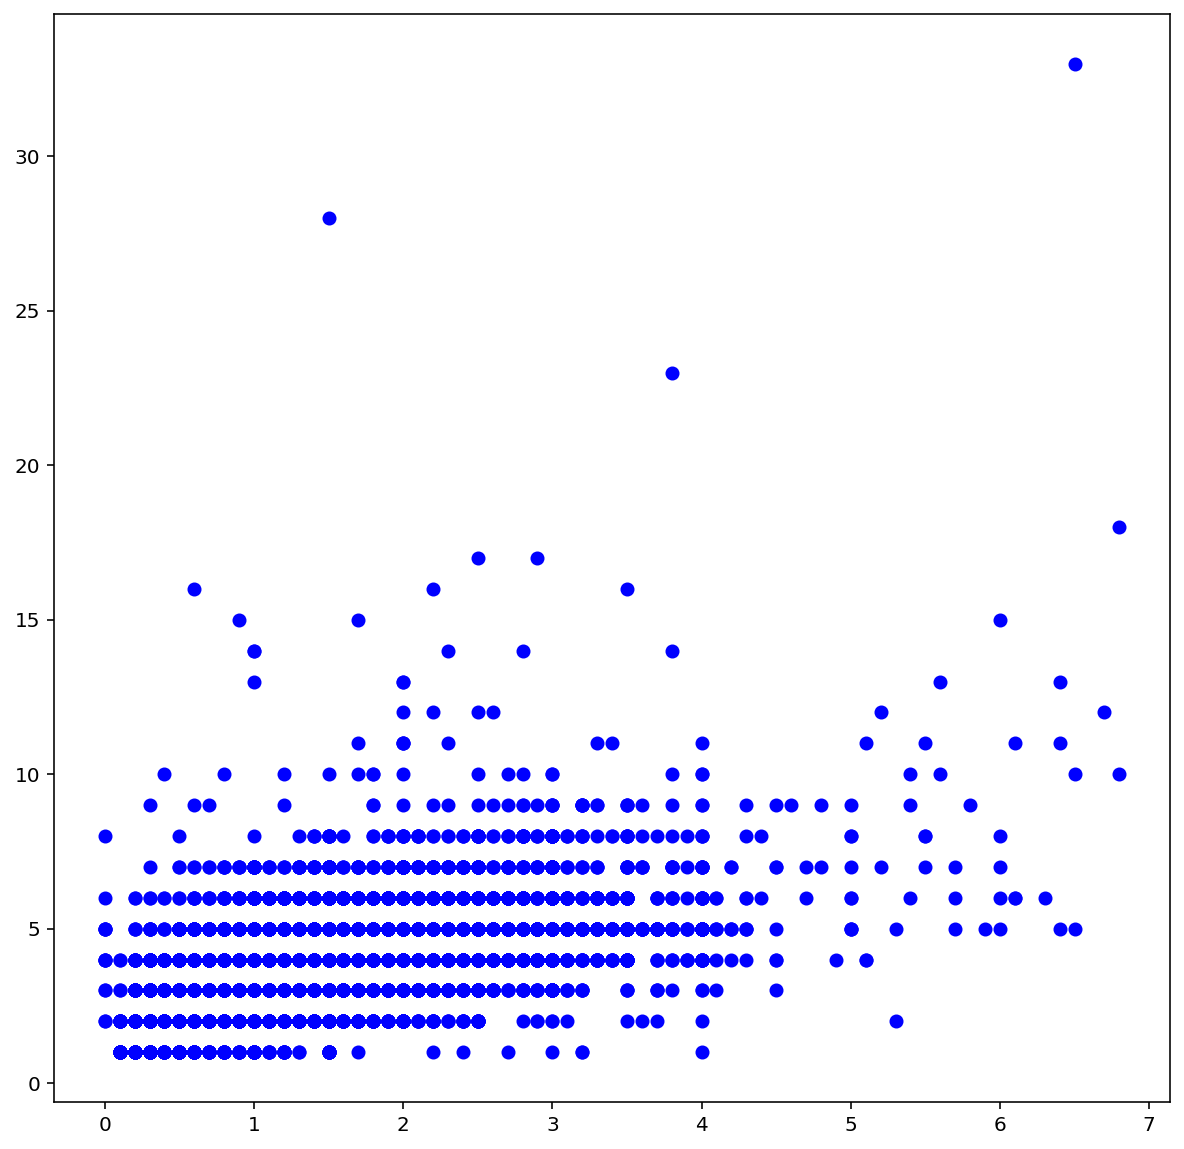

In [142]:
plt.plot(fire_df_new["소방서거리(㎞)"], fire_df_new['걸린시간'], 'ob')

In [143]:
fire_df_new=fire_df_new[fire_df_new["걸린시간"]<10]

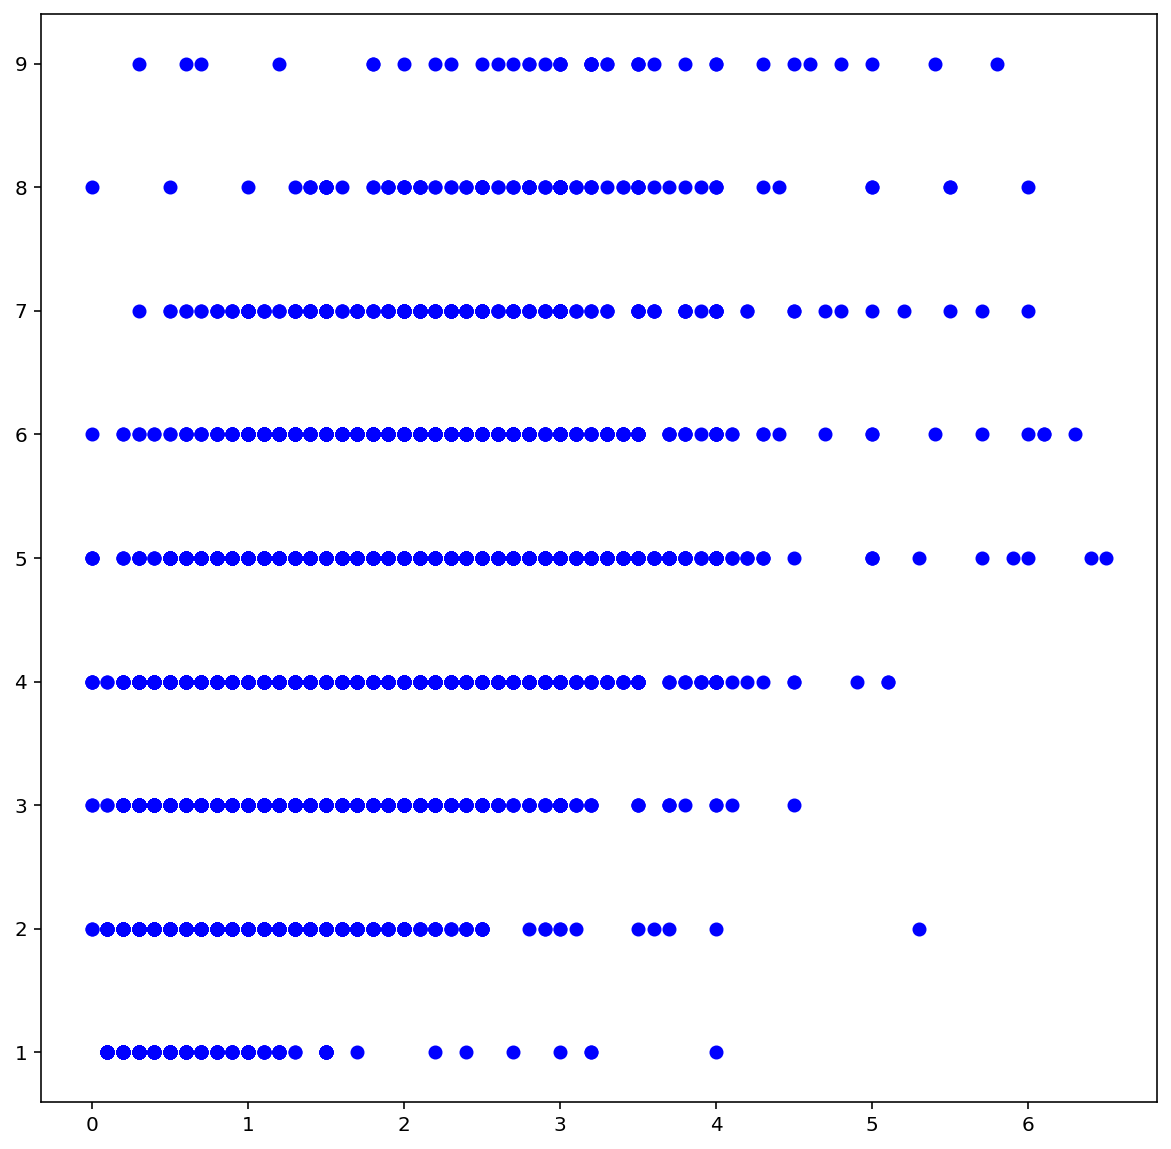

In [144]:
plt.plot(fire_df_new["소방서거리(㎞)"], fire_df_new['걸린시간'], 'ob')

In [146]:
label=[]
datas=[]

for idx, row in fire_df_new.iterrows():
    diff=row['걸린시간']
    label.append(diff)
    
    data=[]
    data.append(int(row['소방서거리(㎞)']))
    data.append(df_uniq_city[df_uniq_city.법정동명==row["시군구"]].index.item())
    datas.append(data)

In [147]:
#svc.SVC Model
train_data, test_data, train_label, test_label = train_test_split(datas, label)

clf=svm.SVC()
clf.fit(train_data, train_label)

pre=clf.predict(test_data)
score=metrics.accuracy_score(test_label, pre)

print('Score:', score)

Score: 0.3545677283864193


In [148]:
#RandomForestClassifer
train_data, test_data, train_label, test_label = train_test_split(datas, label)

clf=RandomForestClassifier()
clf.fit(train_data, train_label)

pre=clf.predict(test_data)
score=metrics.accuracy_score(test_label, pre)

print('Score:', score)

Score: 0.3703185159257963


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50501 missing from c

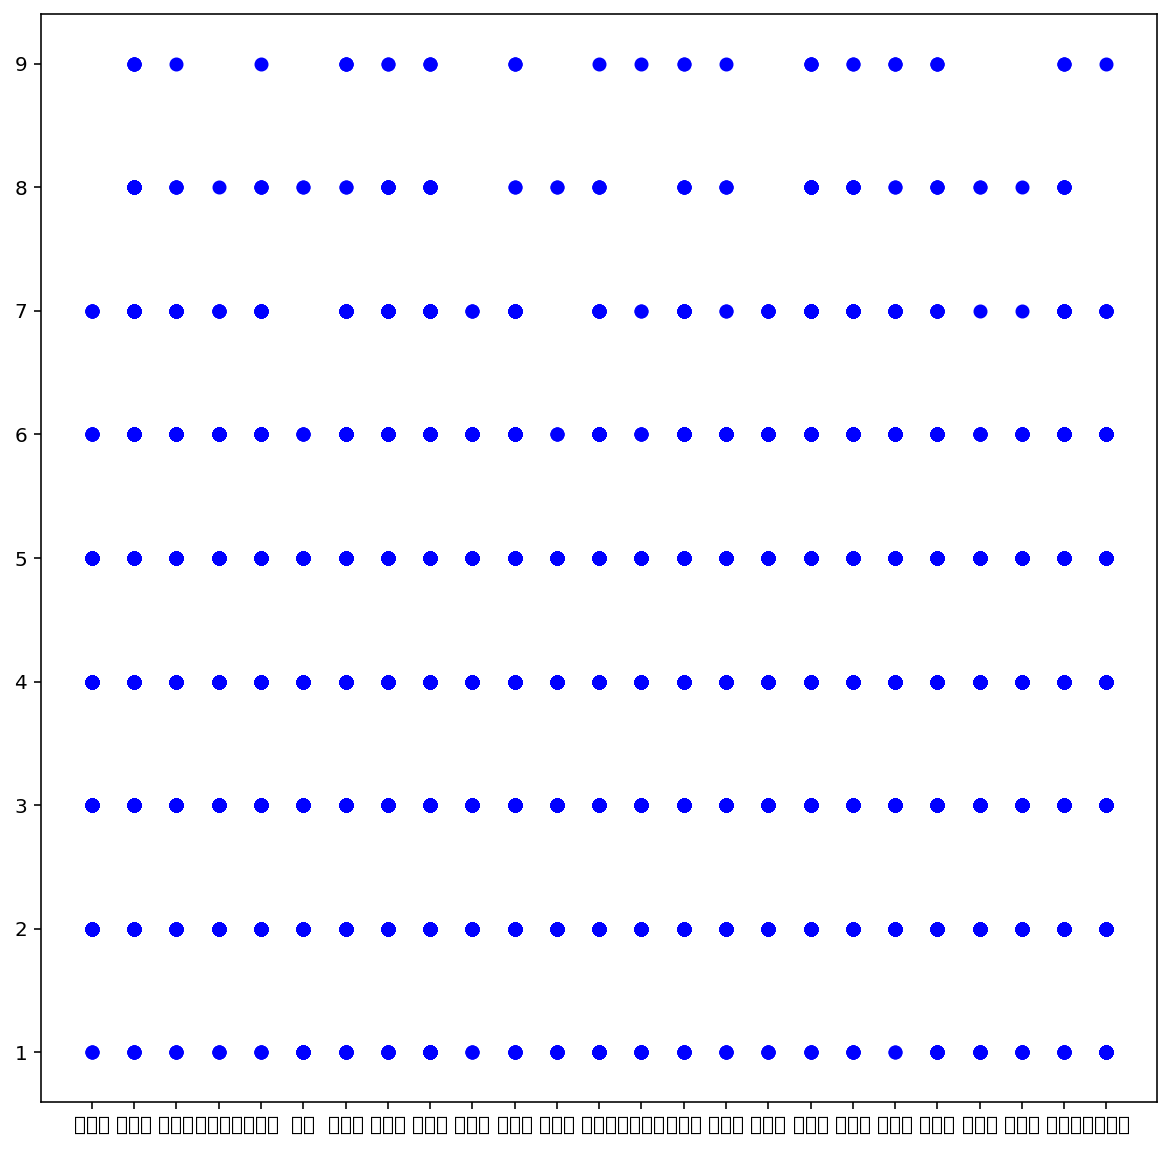

In [149]:
plt.plot(fire_df_new["시군구"], fire_df_new['걸린시간'], "ob")

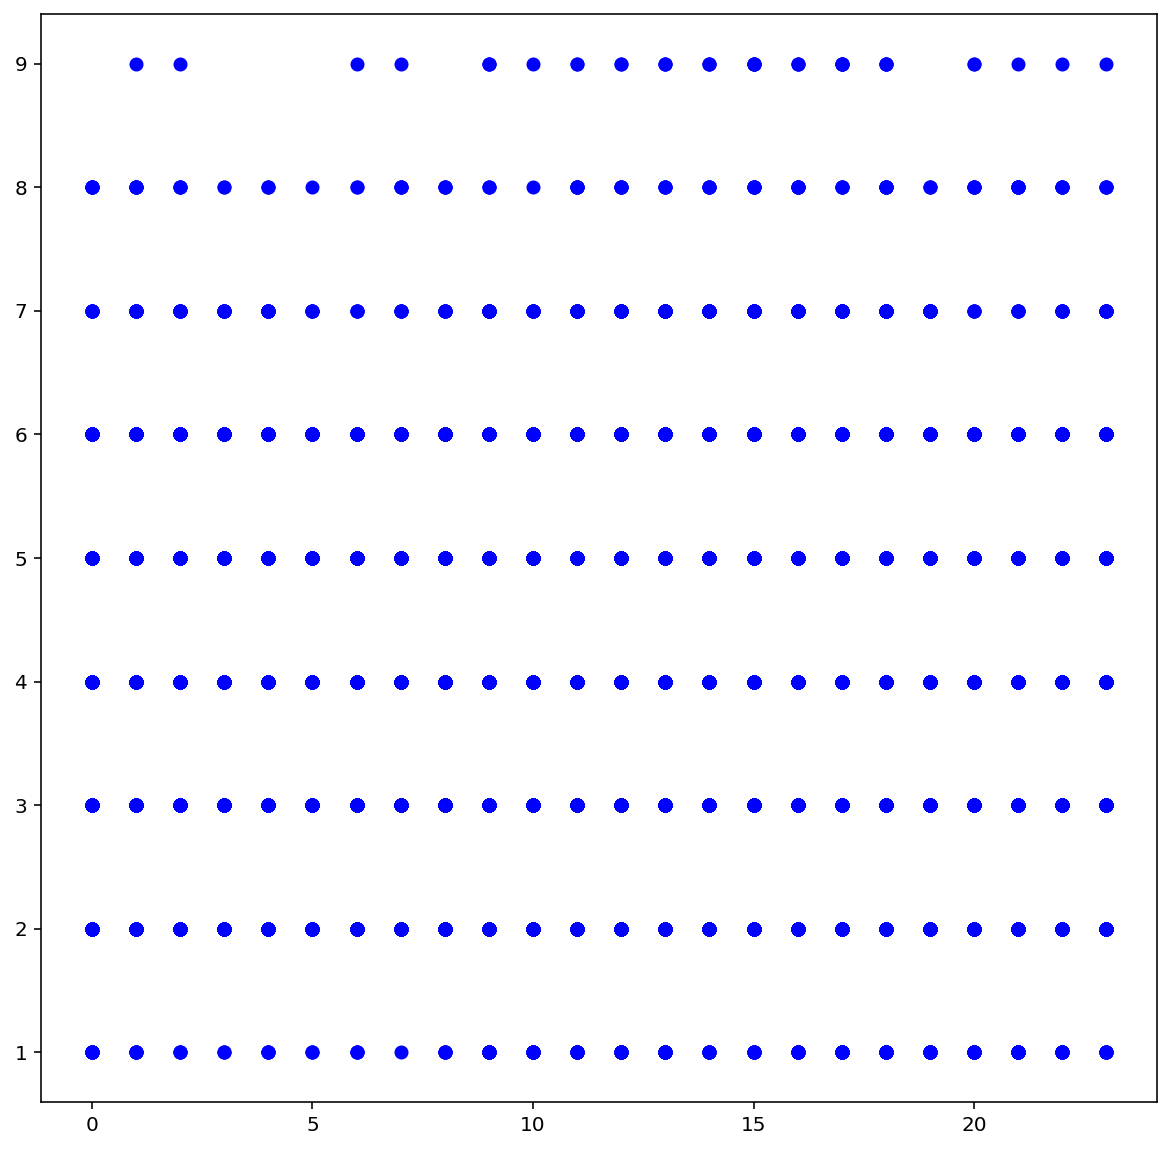

In [150]:
plt.plot(fire_df_new["접수시"], fire_df_new['걸린시간'], "ob")

In [190]:
fire_min_count = fire_df_new[fire_df_new.걸린시간 <= 7].groupby("걸린시간").size()

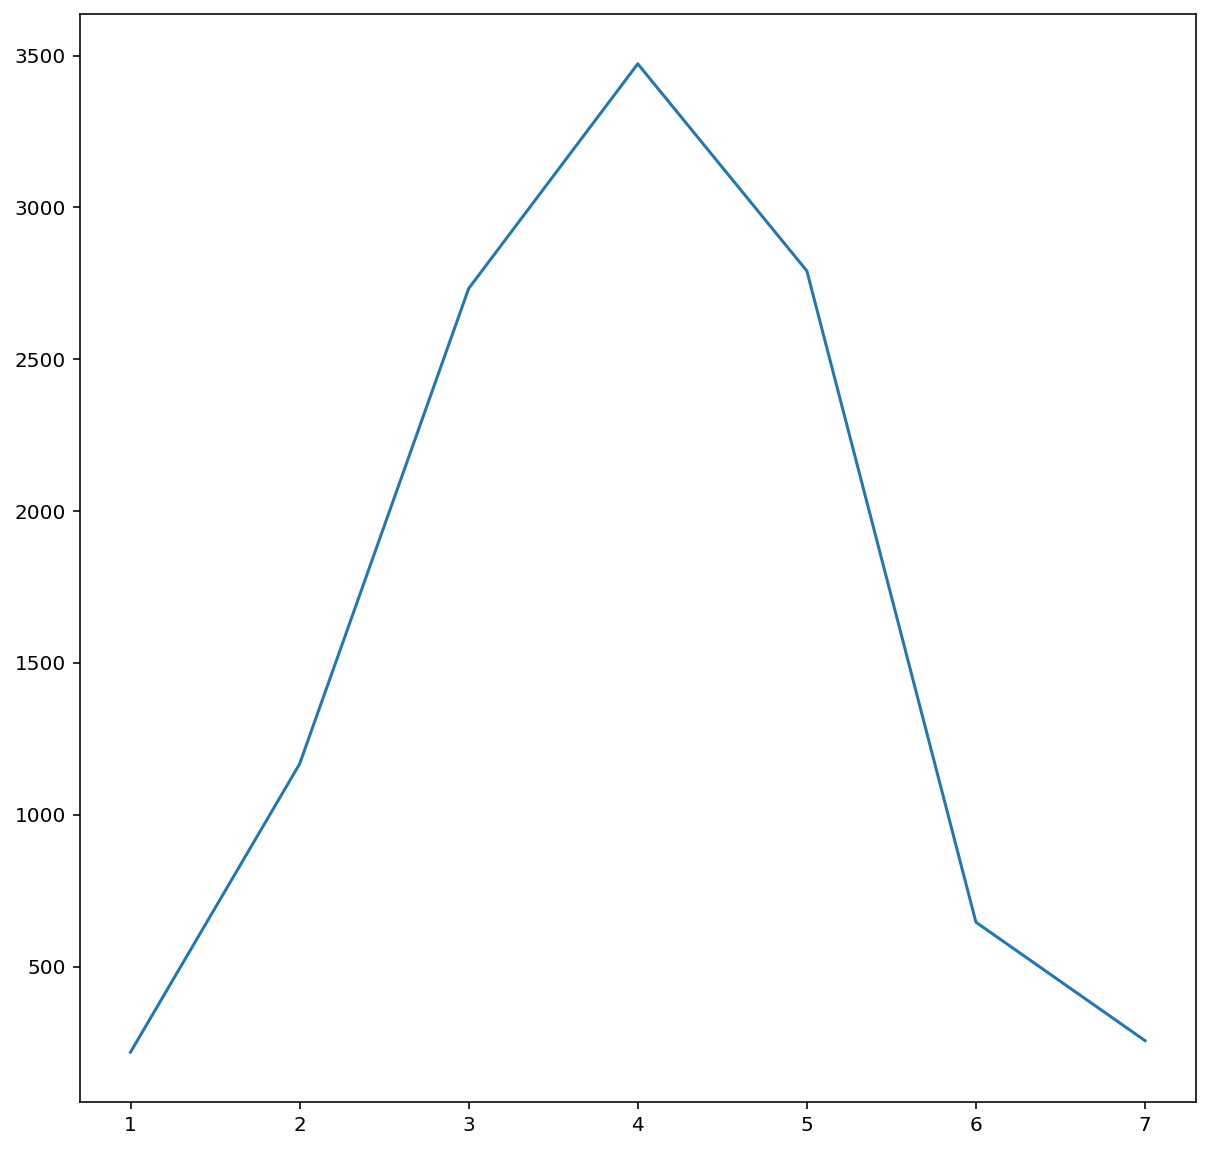

In [191]:
plt.plot(fire_min_count)

In [192]:
len(fire_min_count)

7

In [194]:
fire_df_meaning_data=fire_df_new[fire_df_new.걸린시간 <= 7]

In [195]:
fire_df_meaning_data

,접수일시,시군구,소방서거리(㎞),접수일,접수시간,접수월,접수시,걸린시간
0,2018-01-01 00:49:38,강북구,1.4,2018-01-01,00:49:38,1,0,5
1,2018-01-01 02:34:10,관악구,0.8,2018-01-01,02:34:10,1,2,3
2,2018-01-01 05:04:43,강북구,1.7,2018-01-01,05:04:43,1,5,5
3,2018-01-01 08:09:23,금천구,1.5,2018-01-01,08:09:23,1,8,6
4,2018-01-01 08:20:13,금천구,1.9,2018-01-01,08:20:13,1,8,5
5,2018-01-01 09:35:40,영등포구,1.2,2018-01-01,09:35:40,1,9,4
6,2018-01-01 10:11:38,성동구,0.6,2018-01-01,10:11:38,1,10,4
7,2018-01-01 10:44:41,중구,0.8,2018-01-01,10:44:41,1,10,2
8,2018-01-01 10:53:23,성동구,0.7,2018-01-01,10:53:23,1,10,7
9,2018-01-01 12:45:08,중구,1.2,2018-01-01,12:45:08,1,12,4


In [225]:
label=[]
datas=[]

def bias(time, local):
    if time >= 7 and time <= 9:
        return 50 - traffic_dat[traffic_dat.분류==local]['오전'].item()
    elif time >= 12 and time <= 14:
        return 50 - traffic_dat[traffic_dat.분류==local]['낮'].item()
    elif time >= 17 and time <= 19:
        return 50 - traffic_dat[traffic_dat.분류==local]['오후'].item()
    else:
        return 50 - traffic_dat[traffic_dat.분류==local]['평균'].item()

for idx, row in fire_df_meaning_data.iterrows():
    diff=row['걸린시간']
    label.append(diff)
    
    data=[]
    data.append(row['소방서거리(㎞)'])
    data.append(bias(row['접수시'],row['시군구']))
    datas.append(data)

In [214]:
#svc.SVC Model
train_data, test_data, train_label, test_label = train_test_split(datas, label)

clf=svm.SVC()
clf.fit(train_data, train_label)

pre=clf.predict(test_data)
score=metrics.accuracy_score(test_label, pre)

print('Score:', score)

Score: 0.37681673165544133


In [215]:
#RandomForestClassifer
train_data, test_data, train_label, test_label = train_test_split(datas, label)

clf=RandomForestClassifier()
clf.fit(train_data, train_label)

pre=clf.predict(test_data)
score=metrics.accuracy_score(test_label, pre)

print('Score:', score)

Score: 0.38107054236086496


In [216]:
traffic_dat=pd.read_csv('./서울시 차량통행속도 (구별,요일별) 통계.txt', delimiter='\t')

In [222]:
traffic_dat

,기간,대분류,분류,총연장(㎞),평균,오전,낮,오후,월,화,수,목,금,토,일,평일,주말
0,2019,전체,전체,"1,436.7",23.8,26.0,23.8,20.4,23.4,23.1,23.2,23.3,22.6,24.0,26.6,23.1,25.3
1,2019,권역별,강남,730.9,24.2,26.4,24.5,20.4,23.8,23.4,23.6,23.6,22.9,24.6,27.5,23.5,26.0
2,2019,권역별,강북,705.8,23.3,25.6,23.2,20.3,23.0,22.7,22.9,22.9,22.3,23.4,25.8,22.8,24.6
3,2019,자치구별,종로구,45.9,22.7,26.0,21.8,19.7,22.7,22.1,22.1,22.2,21.6,22.8,25.1,22.2,24.0
4,2019,자치구별,중구,43.8,19.6,23.8,18.3,16.4,19.4,18.6,18.8,18.7,18.1,20.5,23.0,18.7,21.8
5,2019,자치구별,용산구,62.1,26.5,30.1,26.4,21.9,26.8,25.9,26.0,25.9,24.8,26.7,29.5,25.9,28.1
6,2019,자치구별,성동구,57,24.9,27.1,25.0,21.8,24.3,23.8,24.1,24.1,23.3,25.8,28.9,23.9,27.4
7,2019,자치구별,광진구,53.4,24.9,26.9,25.4,21.7,24.5,24.3,24.5,24.5,23.9,24.8,27.9,24.3,26.3
8,2019,자치구별,동대문구,50.4,24.0,25.6,23.8,21.6,23.2,23.3,23.5,23.6,23.2,24.5,26.6,23.4,25.6
9,2019,자치구별,중랑구,49.7,23.5,25.8,23.9,20.2,23.0,23.1,23.3,23.3,22.8,23.4,25.8,23.1,24.6


26.4